# Valtteri Bottas
<img src="https://www.formula1.com/content/fom-website/en/drivers/valtteri-bottas/_jcr_content/image.img.1920.medium.jpg/1646819266274.jpg" width="300">

### Team: Alfa Romeo
<img src ="https://www.formula1.com/content/fom-website/en/drivers/valtteri-bottas/_jcr_content/helmet.img.png/1646824626429.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

bot_laps <- lap_data %>%
            filter(driverId == 822)

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


raceId,n
<dbl>,<int>
883,57
902,57
929,57
971,57
990,57
1011,57
1045,57
949,56
1052,56


`geom_smooth()` using formula 'y ~ x'



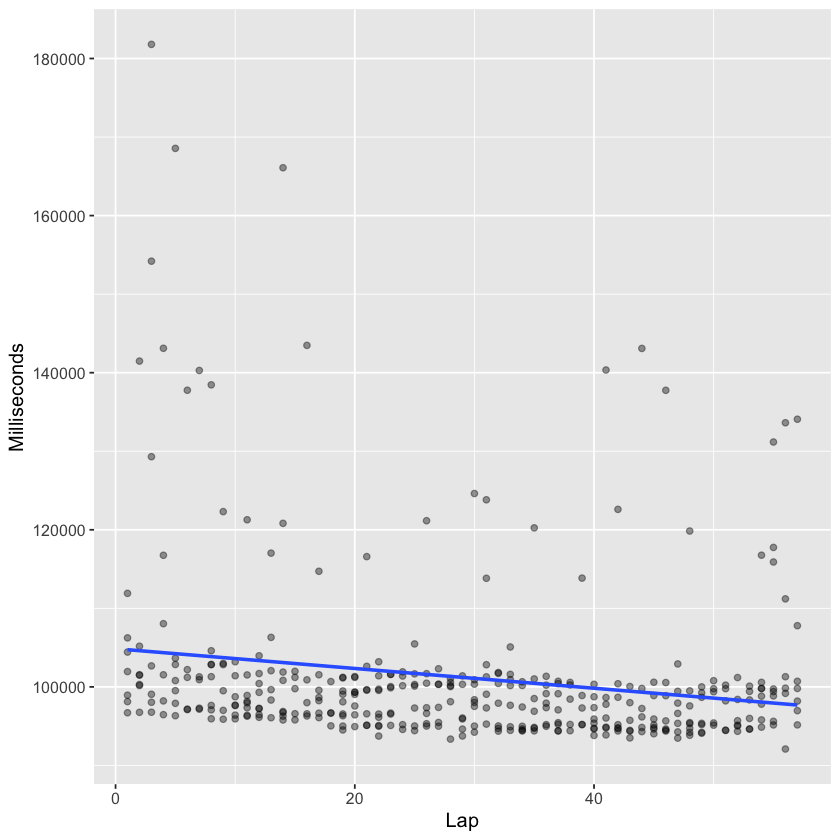

In [5]:
set.seed(2022)

#1. Bahrain 

set.seed(620)

vb_bahrain <- bot_laps %>%
                filter(raceId %in% bahrain_race_ID) 

vb_bahrain_clean <- vb_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
vb_bahrain_clean
vb_bahrain_clean_ID <- vb_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_bahrain_races <- bot_laps %>%
                    filter(raceId %in% vb_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:598)

formulaone_split <- initial_split(vb_bahrain_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



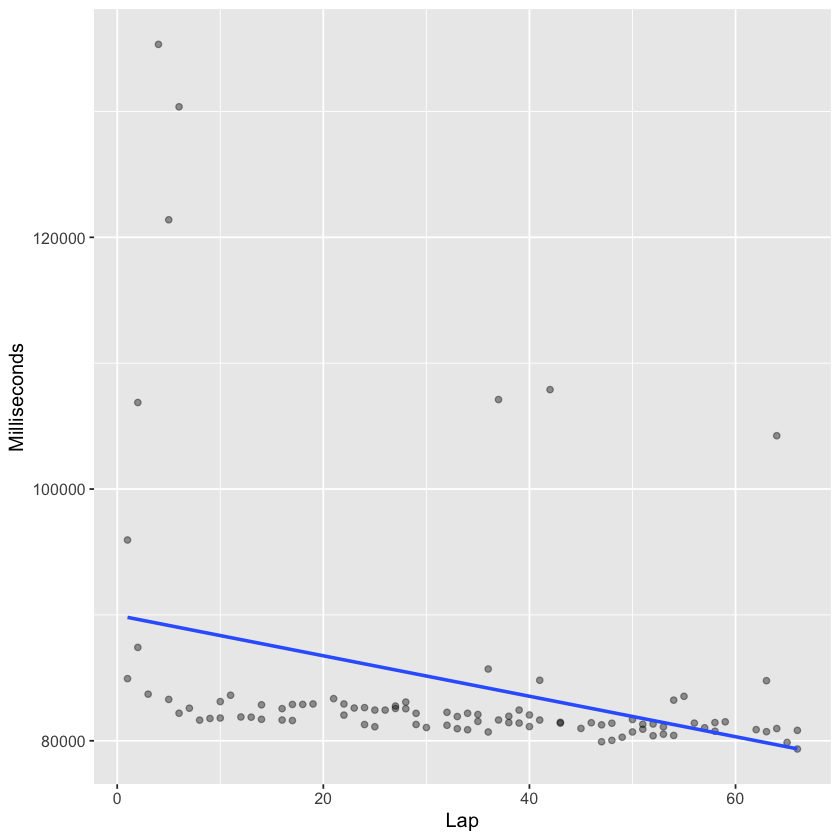

In [6]:
set.seed(2022)

#2. Portimão

vb_Portimão <- bot_laps %>%
                filter(raceId %in% Portimão_race_ID) 

vb_Portimão_clean <- vb_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_Portimão_clean
vb_Portimão_clean_ID <- vb_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_Portimão_races <- bot_laps %>%
                    filter(raceId %in% vb_Portimão_clean_ID) 

formulaone_split <- initial_split(vb_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
989,58
1010,58
880,57
900,57
948,57
969,57


`geom_smooth()` using formula 'y ~ x'



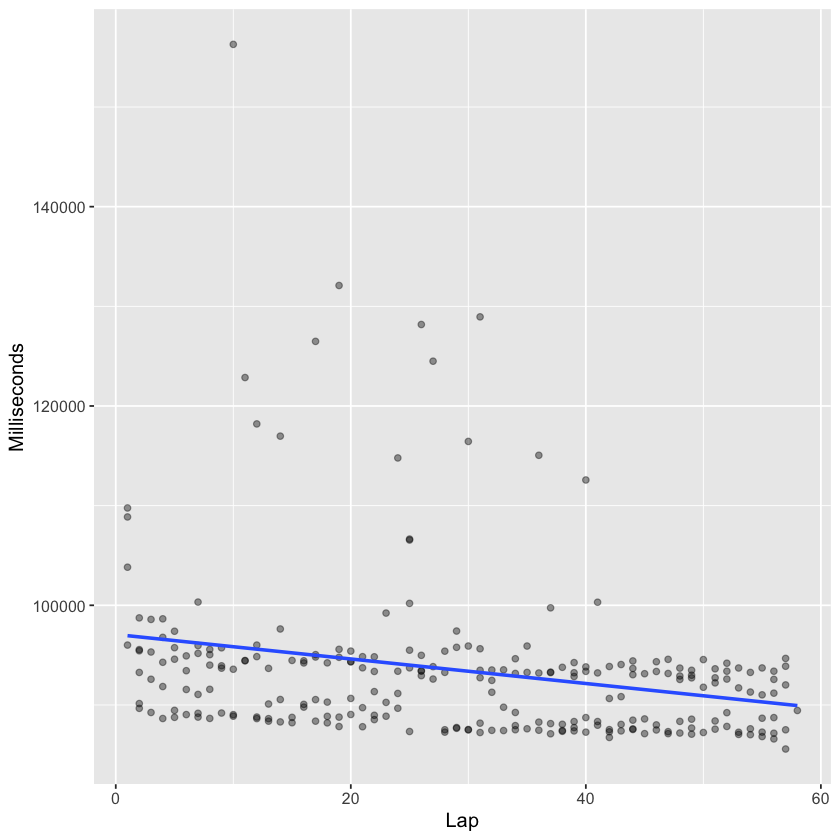

In [7]:
set.seed(2022)

#3. Australia

vb_aus <- bot_laps %>%
                filter(raceId %in% aus_race_ID) 

vb_aus_clean <- vb_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_aus_clean
vb_aus_clean_ID <- vb_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_aus_races <- bot_laps %>%
                    filter(raceId %in% vb_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(vb_aus_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1043,63
1053,30


`geom_smooth()` using formula 'y ~ x'



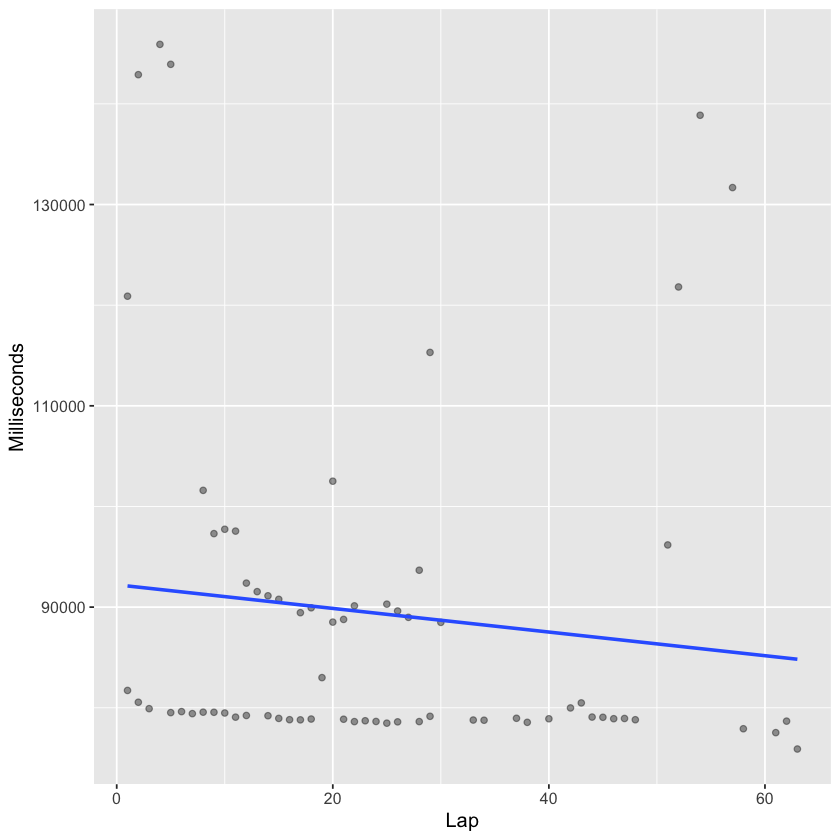

In [8]:
set.seed(2022)

#4. Italy, Imola

vb_imola <- bot_laps %>%
                filter(raceId %in% imola_race_ID) 

vb_imola_clean <- vb_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_imola_clean
vb_imola_clean_ID <- vb_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_imola_races <- bot_laps %>%
                    filter(raceId %in% vb_imola_clean_ID)

formulaone_split <- initial_split(vb_imola_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1067,58
1044,57


`geom_smooth()` using formula 'y ~ x'



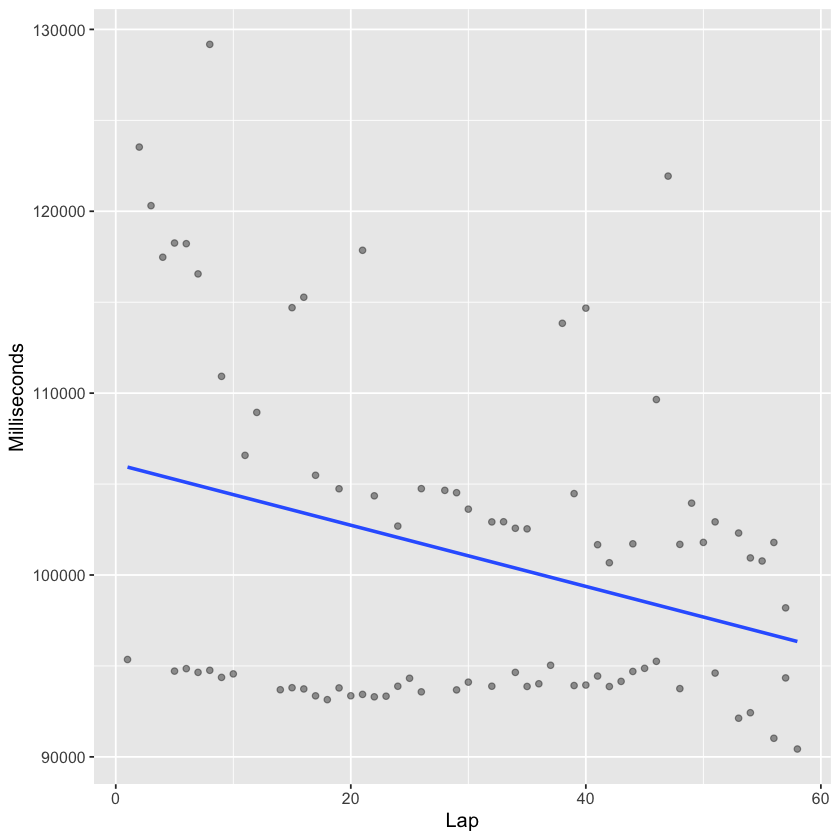

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

vb_turkey <- bot_laps %>%
                filter(raceId %in% turkey_race_ID) 

vb_turkey_clean <- vb_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_turkey_clean
vb_turkey_clean_ID <- vb_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_turkey_races <- bot_laps %>%
                    filter(raceId %in% vb_turkey_clean_ID)  %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(vb_turkey_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
904,66
930,66
952,66
993,66
1014,66
1036,66
1055,66
884,65
973,38


`geom_smooth()` using formula 'y ~ x'



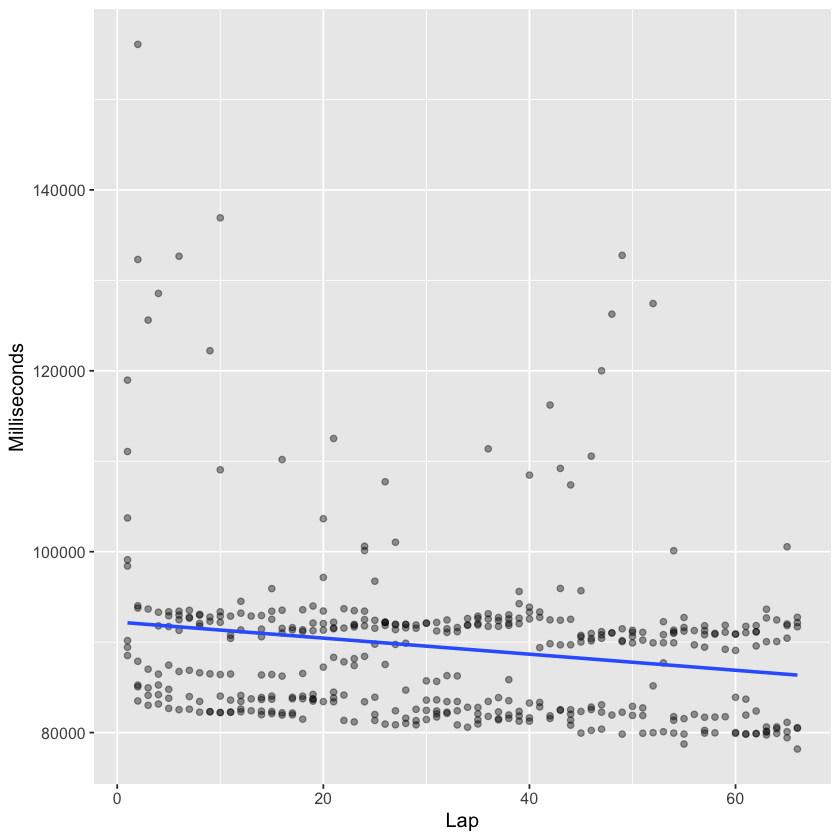

In [10]:
set.seed(2022)

#6. Spain

vb_spain <- bot_laps %>%
                filter(raceId %in% spain_race_ID) 

vb_spain_clean <- vb_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_spain_clean
vb_spain_clean_ID <- vb_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_spain_races <- bot_laps %>%
                    filter(raceId %in% vb_spain_clean_ID) 

formulaone_split <- initial_split(vb_spain_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
885,78
931,78
974,78
994,78
1015,78
953,77
905,55
1056,29


`geom_smooth()` using formula 'y ~ x'



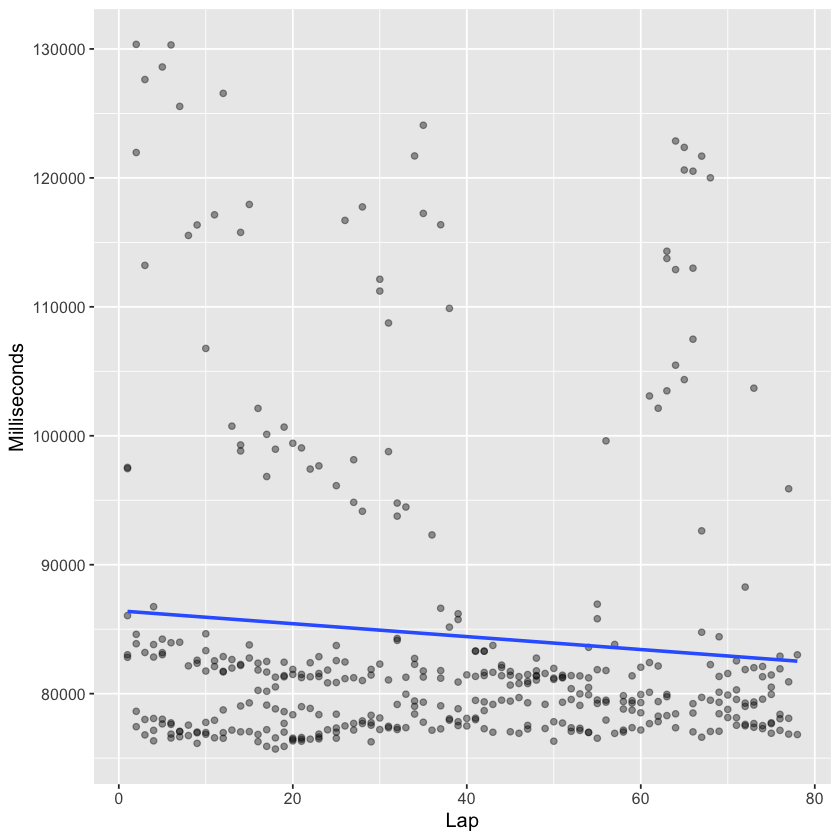

In [11]:
set.seed(2022)

#7. Monaco

vb_monaco <- bot_laps %>%
                filter(raceId %in% monaco_race_ID) 

vb_monaco_clean <- vb_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_monaco_clean
vb_monaco_clean_ID <- vb_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_monaco_races <- bot_laps %>%
                    filter(raceId %in% vb_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(vb_monaco_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
955,51
976,51
1013,51
1057,51
992,48


`geom_smooth()` using formula 'y ~ x'



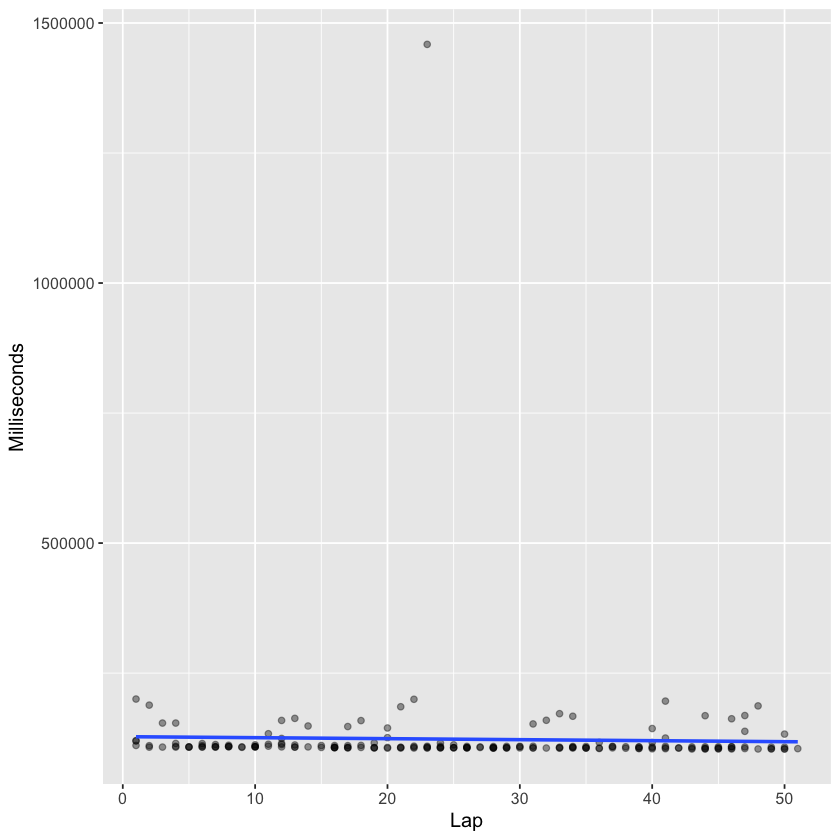

In [12]:
set.seed(2022)

#8. Azerbaijan

vb_azerbaijan <- bot_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

vb_azerbaijan_clean <- vb_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_azerbaijan_clean
vb_azerbaijan_clean_ID <- vb_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_azerbaijan_races <- bot_laps %>%
                    filter(raceId %in% vb_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(vb_azerbaijan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
906,70
932,70
954,70
975,70
1016,70
886,69
995,68


`geom_smooth()` using formula 'y ~ x'



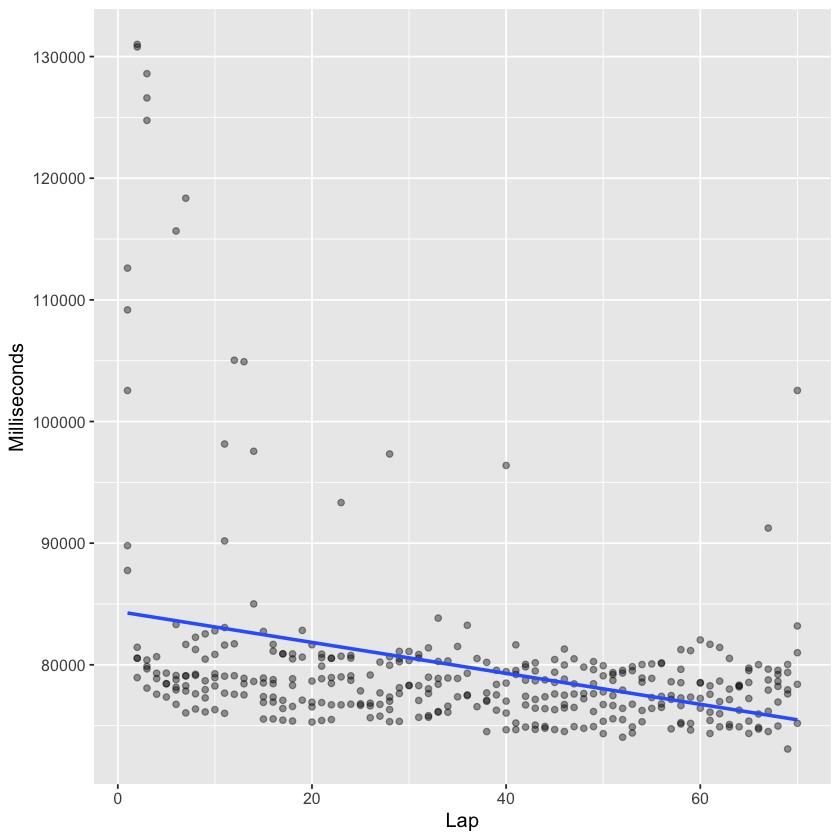

In [13]:
set.seed(2022)

#9. Canada

vb_canada <- bot_laps %>%
                filter(raceId %in% canada_race_ID) 

vb_canada_clean <- vb_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_canada_clean
vb_canada_clean_ID <- vb_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_canada_races <- bot_laps %>%
                    filter(raceId %in% vb_canada_clean_ID)

formulaone_split <- initial_split(vb_canada_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

raceId,n
<dbl>,<int>
887,52
908,52
934,52
998,52
1019,52
1034,52
1035,52
1061,52
957,51


`geom_smooth()` using formula 'y ~ x'



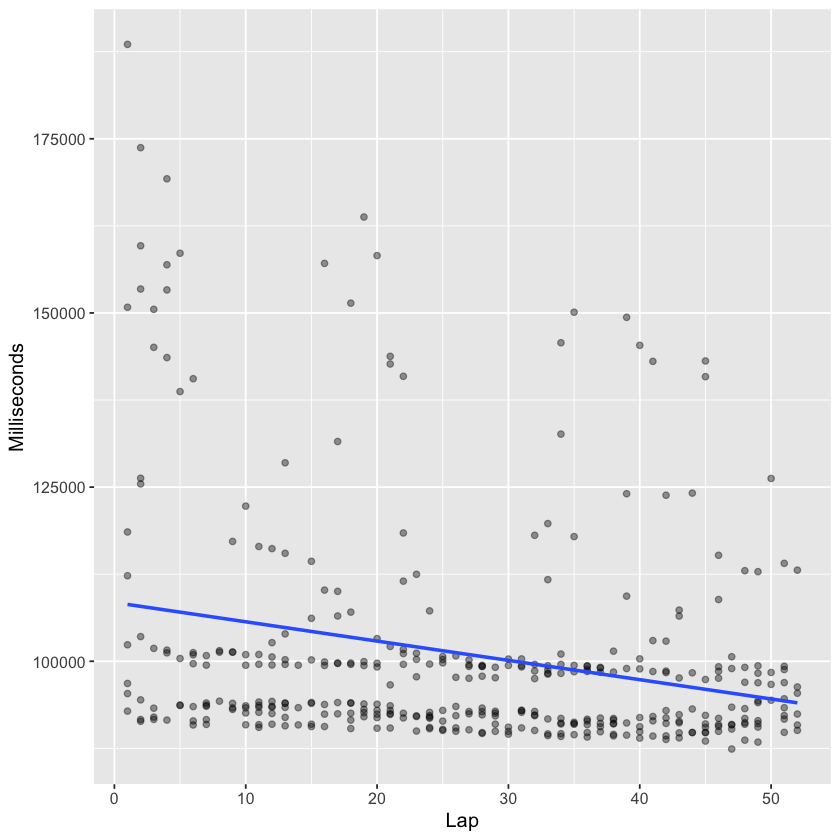

In [14]:
set.seed(2022)

#10. Great Britain

vb_uk <- bot_laps %>%
                filter(raceId %in% uk_race_ID) 

vb_uk_clean <- vb_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_uk_clean
vb_uk_clean_ID <- vb_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_uk_races <- bot_laps %>%
                    filter(raceId %in% vb_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(vb_uk_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

raceId,n
<dbl>,<int>
907,71
933,71
977,71
1018,71
1031,71
1032,71
1058,71
1060,71
956,70


`geom_smooth()` using formula 'y ~ x'



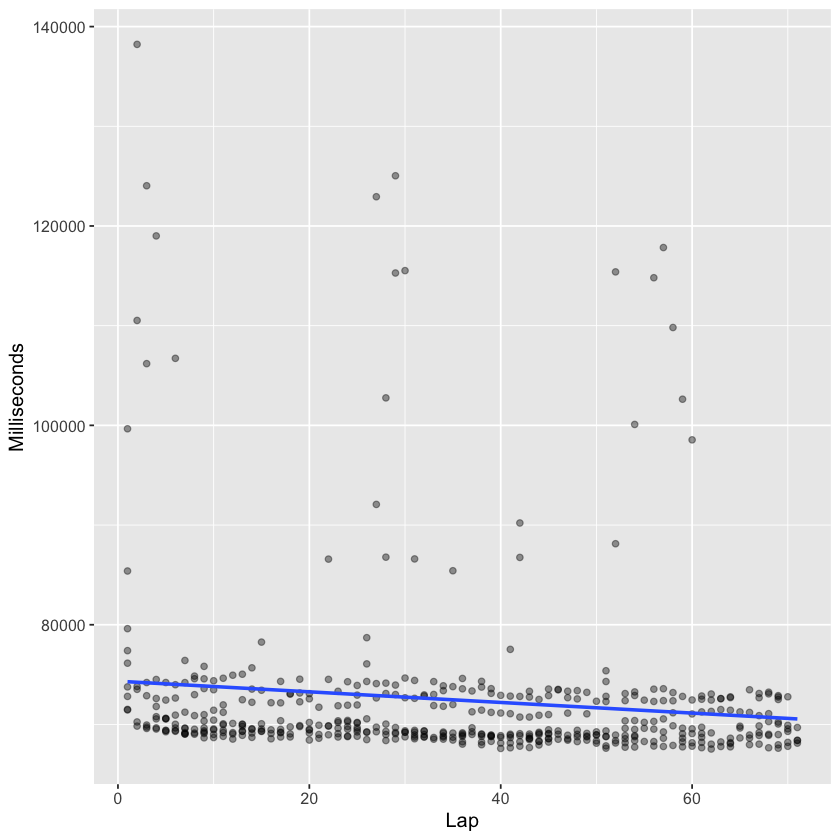

In [15]:
set.seed(2022)

#11. Austria

vb_austria <- bot_laps %>%
                filter(raceId %in% austria_race_ID) 

vb_austria_clean <- vb_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_austria_clean
vb_austria_clean_ID <- vb_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_austria_races <- bot_laps %>%
                    filter(raceId %in% vb_austria_clean_ID)

formulaone_split <- initial_split(vb_austria_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



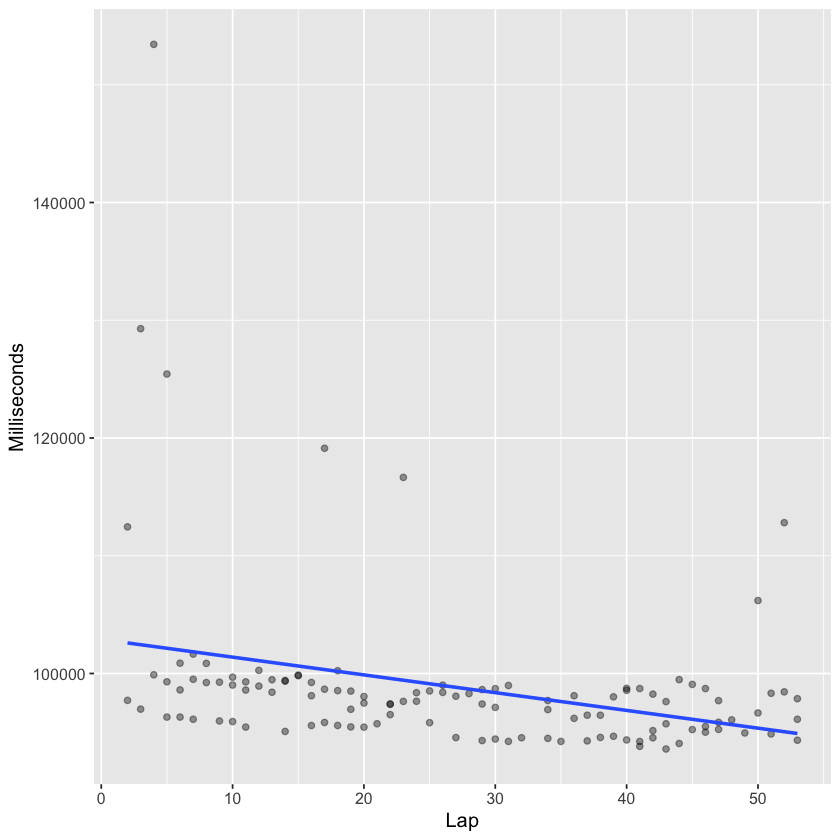

In [16]:
set.seed(2022)

#12. France

vb_france <- bot_laps %>%
                filter(raceId %in% france_race_ID) 

vb_france_clean <- vb_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_france_clean
vb_france_clean_ID <- vb_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_france_races <- bot_laps %>%
                    filter(raceId %in% vb_france_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(vb_france_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

raceId,n
<dbl>,<int>
910,70
979,70
1000,70
1033,70
936,69
958,69
1021,69
890,42


`geom_smooth()` using formula 'y ~ x'



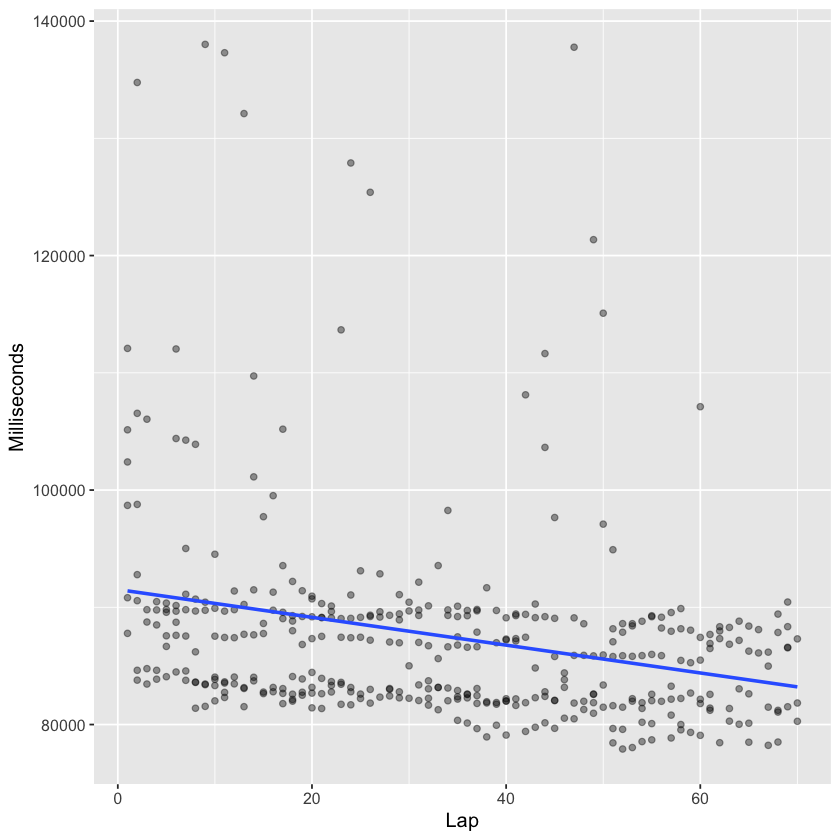

In [17]:
set.seed(2022)

#13. Hungary

vb_hungary <- bot_laps %>%
                filter(raceId %in% hungary_race_ID) 

vb_hungary_clean <- vb_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                    
vb_hungary_clean
vb_hungary_clean_ID <- vb_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_hungary_races <- bot_laps %>%
                    filter(raceId %in% vb_hungary_clean_ID)

formulaone_split <- initial_split(vb_hungary_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
891,44
911,44
960,44
980,44
1001,44
1022,44
1037,44
937,43
1063,1


`geom_smooth()` using formula 'y ~ x'



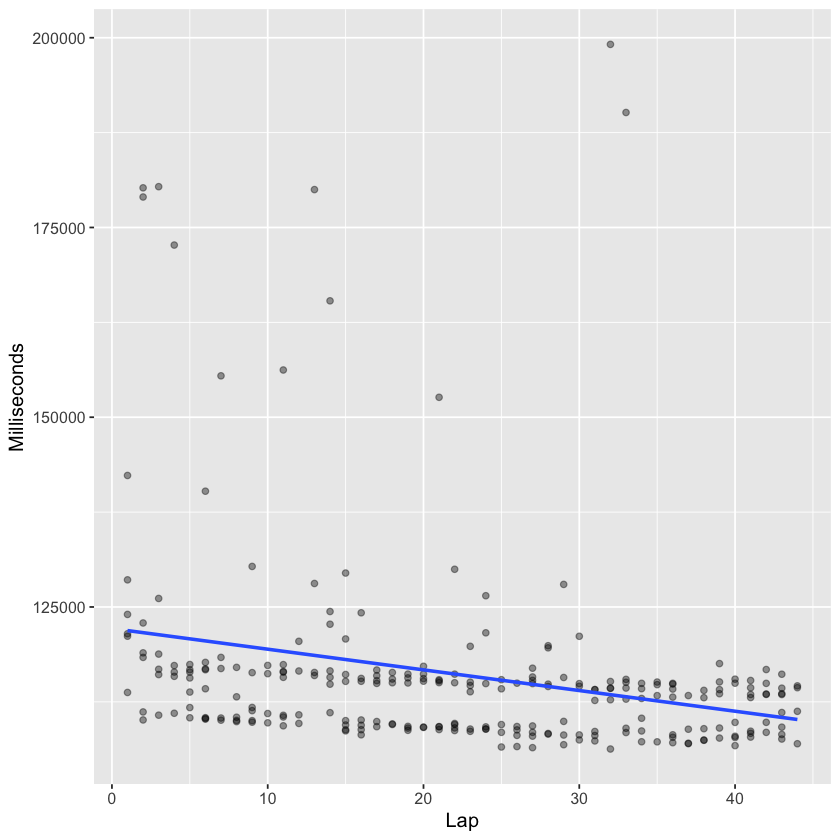

In [18]:
set.seed(2022)

#14. Belgium

vb_belgium <- bot_laps %>%
                filter(raceId %in% belgium_race_ID) 

vb_belgium_clean <- vb_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_belgium_clean
vb_belgium_clean_ID <- vb_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_belgium_races <- bot_laps %>%
                    filter(raceId %in% vb_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(vb_belgium_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



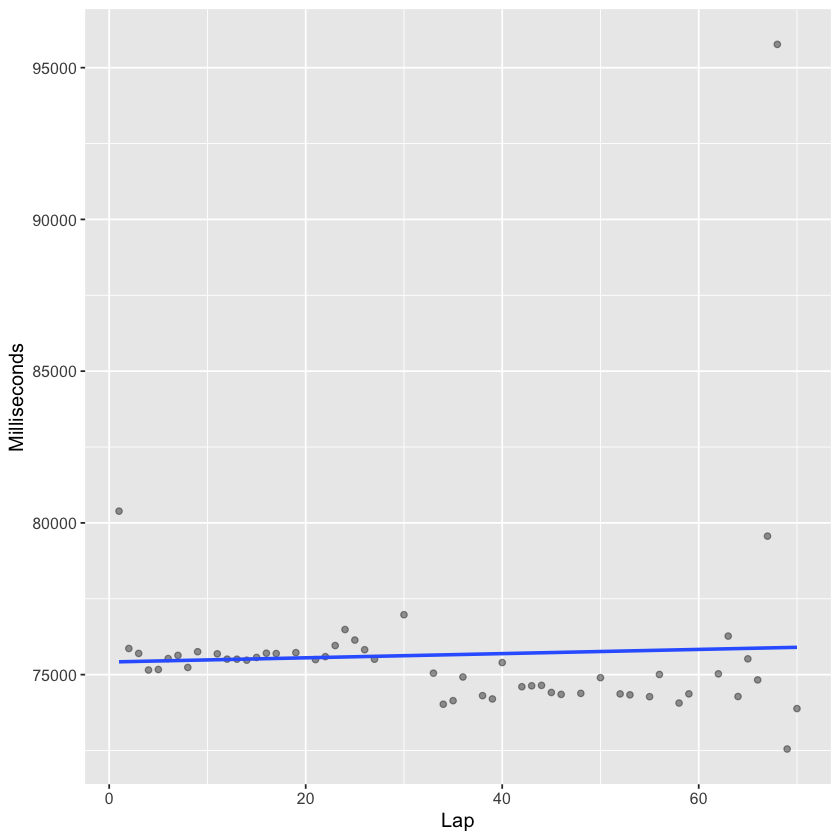

In [19]:
set.seed(2022)

#15. Netherlands

vb_netherlands <- bot_laps %>%
                filter(raceId %in% netherlands_race_ID) 

vb_netherlands_clean <- vb_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_netherlands_clean
vb_netherlands_clean_ID <- vb_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_netherlands_races <- bot_laps %>%
                    filter(raceId %in% vb_netherlands_clean_ID)

formulaone_split <- initial_split(vb_netherlands_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
892,53
912,53
938,53
961,53
981,53
1002,53
1023,53
1038,53
1065,53


`geom_smooth()` using formula 'y ~ x'



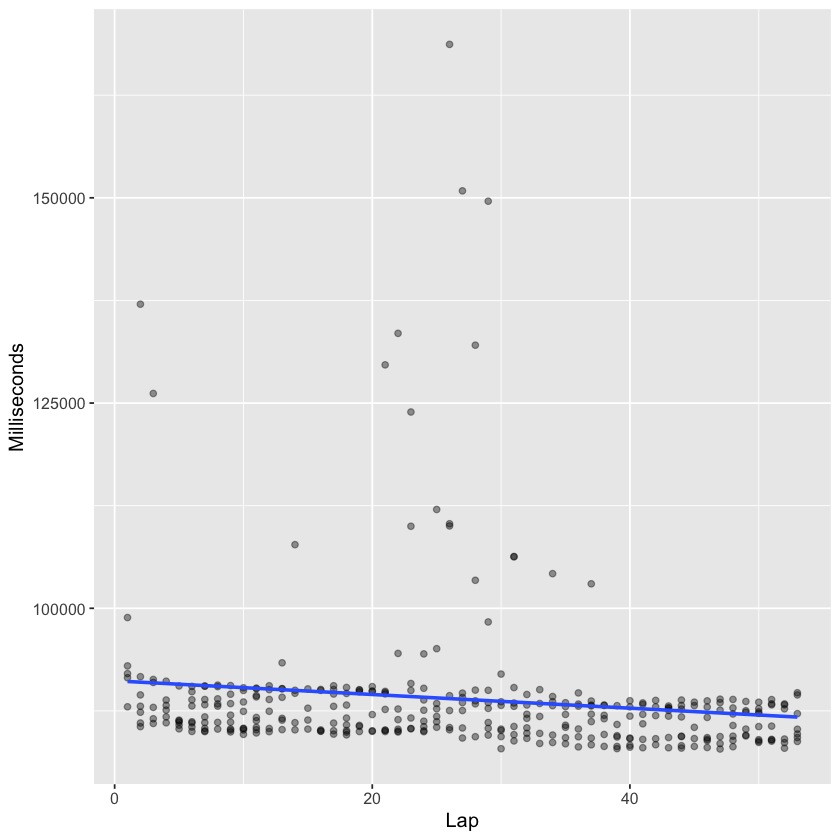

In [20]:
set.seed(2022)

#16. Italy, Monza

vb_monza <- bot_laps %>%
                filter(raceId %in% monza_race_ID) 

vb_monza_clean <- vb_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
vb_monza_clean
vb_monza_clean_ID <- vb_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_monza_races <- bot_laps %>%
                    filter(raceId %in% vb_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(vb_monza_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

raceId,n
<dbl>,<int>
893,61
939,61
1003,61
1024,61
913,60
982,58
962,35


`geom_smooth()` using formula 'y ~ x'



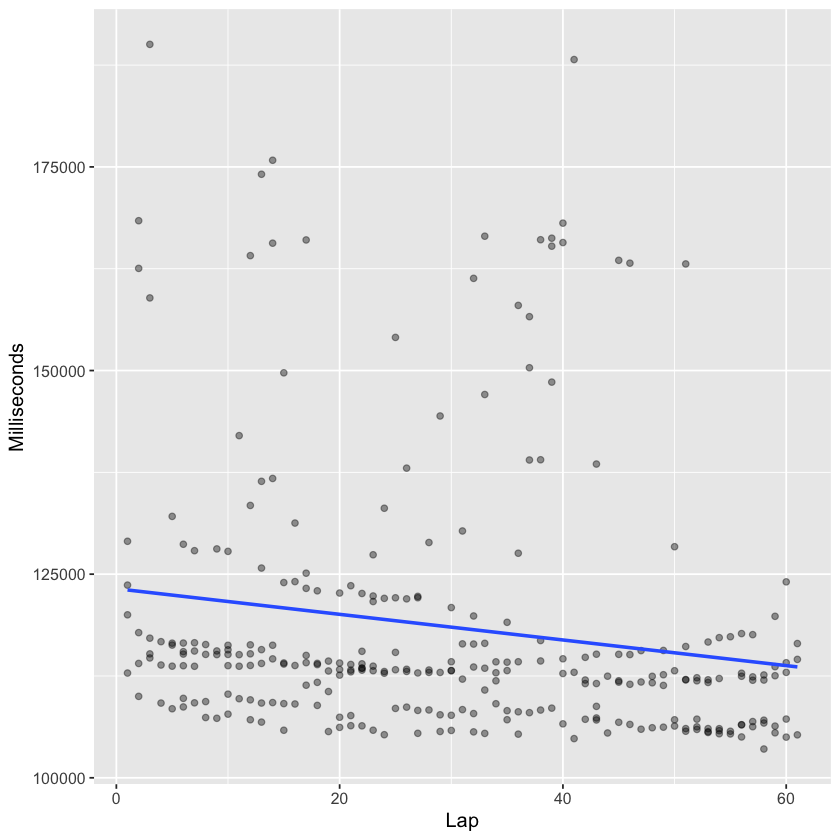

In [21]:
set.seed(2022)

#17. Singapore

vb_singapore <- bot_laps %>%
                filter(raceId %in% singapore_race_ID) 

vb_singapore_clean <- vb_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_singapore_clean
vb_singapore_clean_ID <- vb_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_singapore_races <- bot_laps %>%
                    filter(raceId %in% vb_singapore_clean_ID)

formulaone_split <- initial_split(vb_singapore_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

raceId,n
<dbl>,<int>
940,53
964,53
984,53
1005,53
895,52
1026,52
914,44


`geom_smooth()` using formula 'y ~ x'



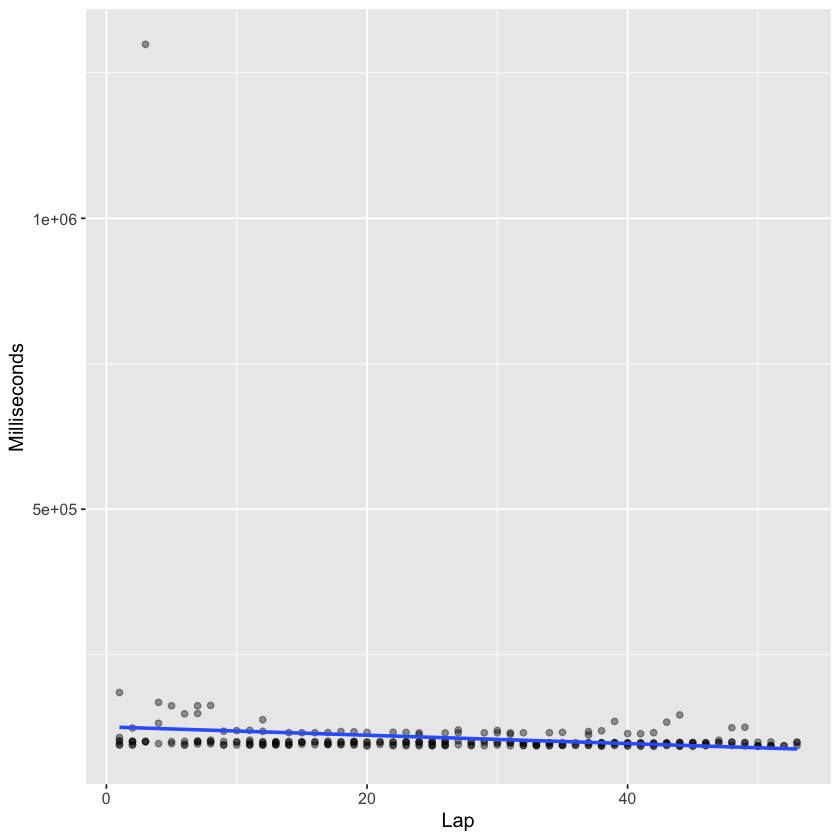

In [22]:
set.seed(2022)

#18. Japan

vb_japan <- bot_laps %>%
                filter(raceId %in% japan_race_ID) 

vb_japan_clean <- vb_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_japan_clean
vb_japan_clean_ID <- vb_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_japan_races <- bot_laps %>%
                    filter(raceId %in% vb_japan_clean_ID)

formulaone_split <- initial_split(vb_japan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

raceId,n
<dbl>,<int>
898,56
916,56
985,56
1006,56
1028,56
1069,56
965,55
942,5


`geom_smooth()` using formula 'y ~ x'



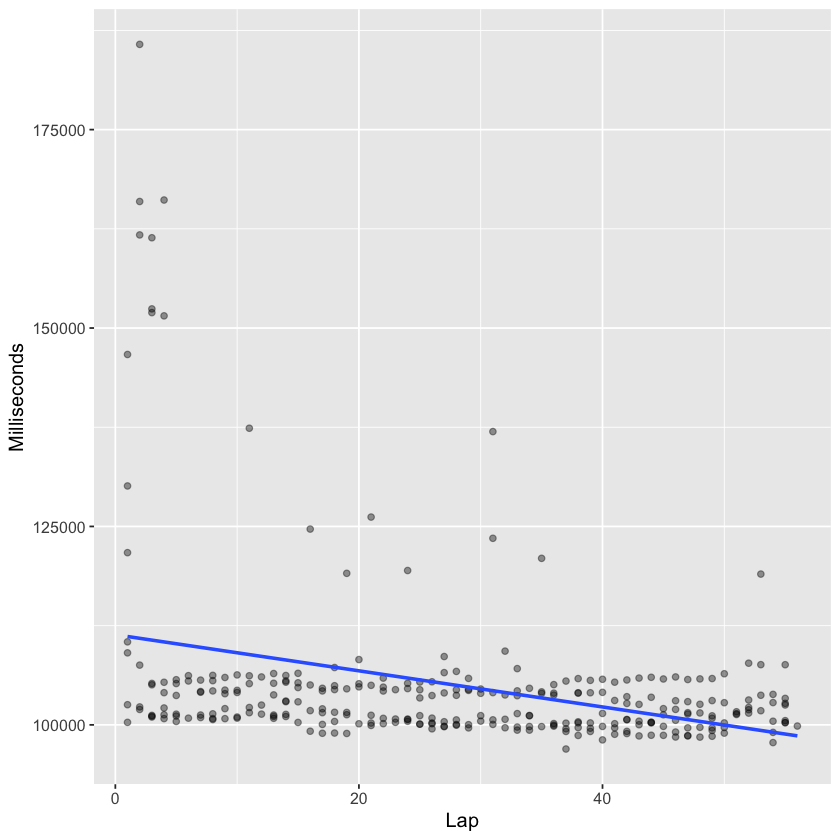

In [23]:
set.seed(2022)

#19. USA, Austin

vb_austin <- bot_laps %>%
                filter(raceId %in% austin_race_ID) 

vb_austin_clean <- vb_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_austin_clean
vb_austin_clean_ID <- vb_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_austin_races <- bot_laps %>%
                    filter(raceId %in% vb_austin_clean_ID)

formulaone_split <- initial_split(vb_austin_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

raceId,n
<dbl>,<int>
943,71
966,71
986,71
1027,71
1007,70
1070,69


`geom_smooth()` using formula 'y ~ x'



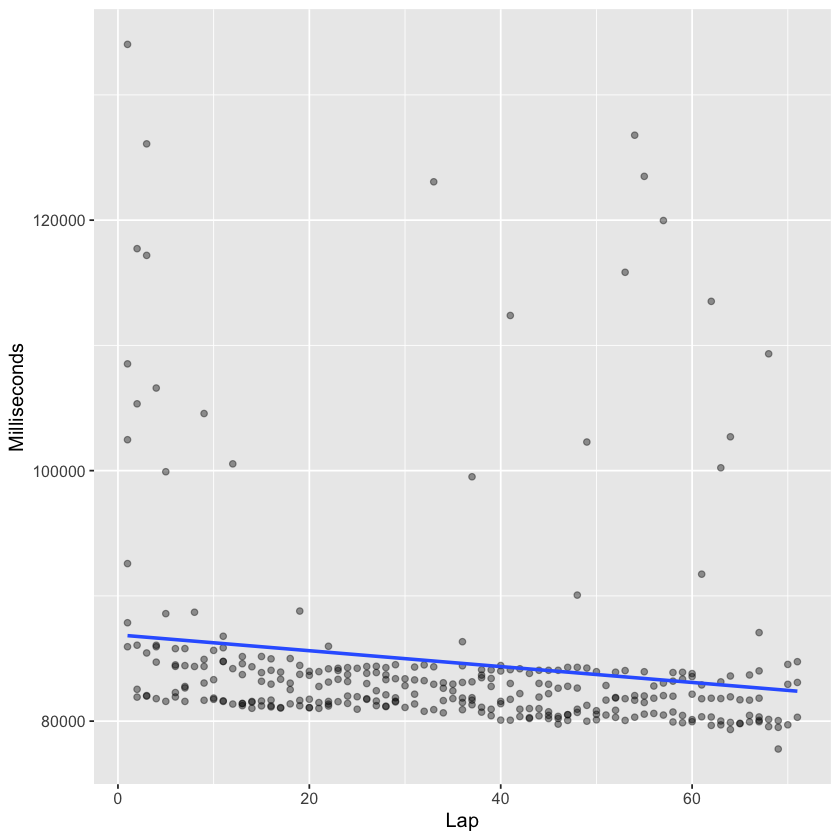

In [24]:
set.seed(2022)

#20. Mexico

vb_mexico <- bot_laps %>%
                filter(raceId %in% mexico_race_ID) 

vb_mexico_clean <- vb_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_mexico_clean
vb_mexico_clean_ID <- vb_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_mexico_races <- bot_laps %>%
                    filter(raceId %in% vb_mexico_clean_ID)

formulaone_split <- initial_split(vb_mexico_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

raceId,n
<dbl>,<int>
967,71
987,71
1008,71
1071,71
917,70
944,70
1029,51
899,45


`geom_smooth()` using formula 'y ~ x'



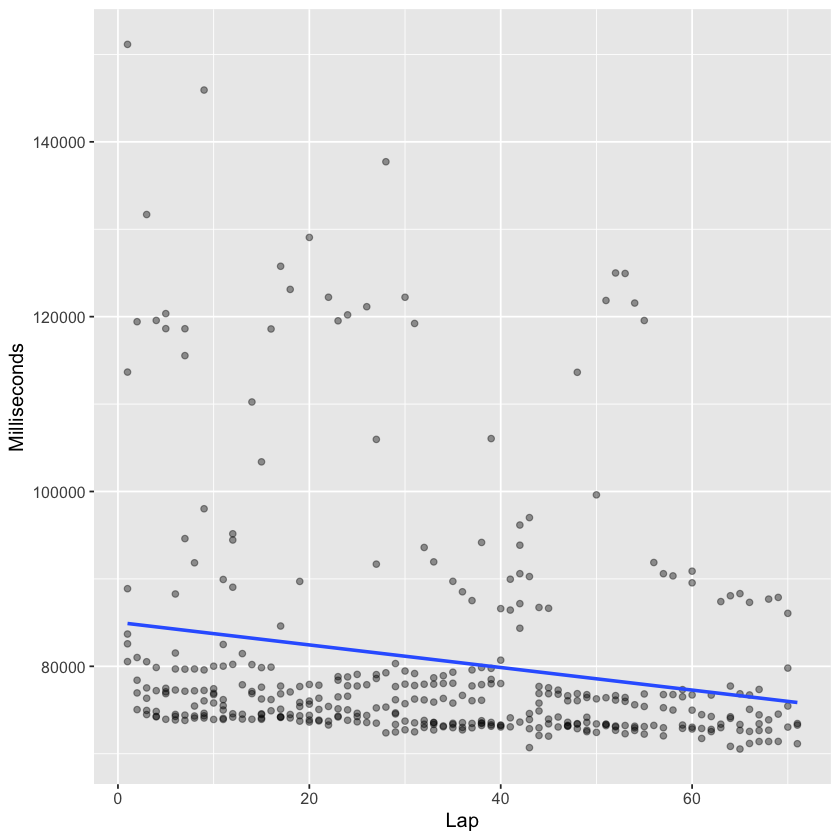

In [25]:
set.seed(2022)

#21. Brazil

vb_brazil <- bot_laps %>%
                filter(raceId %in% brazil_race_ID) 

vb_brazil_clean <- vb_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_brazil_clean
vb_brazil_clean_ID <- vb_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_brazil_races <- bot_laps %>%
                    filter(raceId %in% vb_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(vb_brazil_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
918,55
988,55
1009,55
1030,55
1047,55
897,54
945,54
968,6


`geom_smooth()` using formula 'y ~ x'



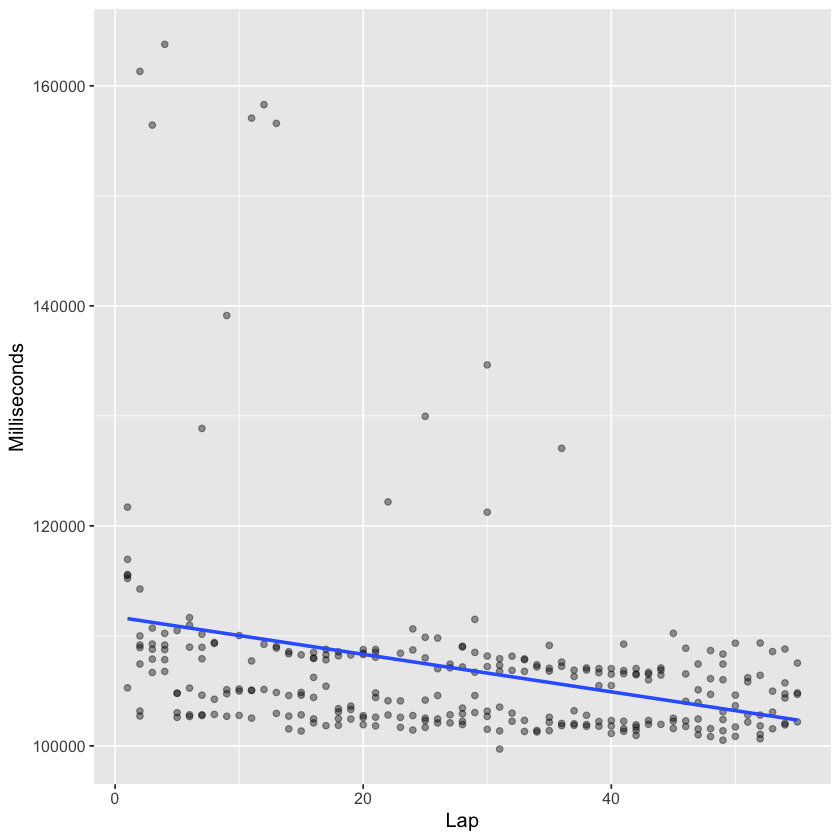

In [26]:
set.seed(2022)

#22. Abu Dhabi

vb_uae <- bot_laps %>%
                filter(raceId %in% uae_race_ID) 

vb_uae_clean <- vb_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
vb_uae_clean
vb_uae_clean_ID <- vb_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

vb_uae_races <- bot_laps %>%
                    filter(raceId %in% vb_uae_clean_ID)

formulaone_split <- initial_split(vb_uae_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [28]:
rmse_col
racetime_col

write_csv(rmse_col, "final_rmse_data/vb_rmse.csv")
write_csv(racetime_col, "final_race_data/vb_race.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,8375.861,1
rmse,standard,9510.709,2
rmse,standard,6673.188,3
rmse,standard,20091.803,4
rmse,standard,8467.675,5
rmse,standard,10136.707,6
rmse,standard,9175.226,7
rmse,standard,21107.605,8
rmse,standard,8214.990,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5769076,96.15127,1.602521,1
5582420,93.04033,1.550672,2
5419856,90.33093,1.505515,3
5573133,92.88555,1.548093,4
5769728,96.16214,1.602702,5
5890200,98.17000,1.636167,6
6586996,109.78327,1.829721,7
6260750,104.34583,1.739097,8
5590875,93.18125,1.553021,9
